# 1. Defining the problem and goal setting

#### **Problem**

Tanzania's water supply infrastructure relies on the functionality of thousands of pumps. Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

#### **Goal**

The goal of this project is to predict the status of these water pumps in Tanzania whether they are operational, require maintenance, or are non-functional—using data from Taarifa and the Tanzanian Ministry of Water. Key variables such as pump type, installation history, and management structure are considered to support better maintenance decisions and enhance water access.

### Importing dependencies

In [135]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings("ignore")
label_encoder = LabelEncoder()

### Reading the data

In [136]:
train=pd.read_csv('/kaggle/input/pump-it-up-challenge-driven-data/training_Set_values.csv')
labels=pd.read_csv('/kaggle/input/pump-it-up-challenge-driven-data/training_Set_labels.csv')
test_df=pd.read_csv('../input/pump-it-up-challenge-driven-data/Test_set_values.csv')

train_df = pd.merge(train, labels, on='id')
train_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [137]:
#checking the dataset length and dimension
print(train_df.shape)
print()
print(test_df.shape)

(59400, 41)

(14850, 40)


In [138]:
# train_df.to_excel("train_df.xlsx",index = False)

# 2. Exploring and being familiarized with the data


The training data set consists of 40 features and one predictive variable 59400 data points.

### Features

**Functional/Feature Variables**

0. id - id number of a row 
1. amount_tsh — Total static head (amount of water available to the waterpoint)  
2. date_recorded — The date the row was entered  
3. funder — Who funded the well  
4. gps_height — Altitude of the well  
5. installer — Organization that installed the well  
6. longitude — GPS coordinate  
7. latitude — GPS coordinate  
8. wpt_name — Name of the waterpoint if there is one  
9. num_private — It is mentioned as private in the data card and hence, no description is available  
10. basin — Geographic water basin  
11. subvillage — Geographic location  
12. region — Geographic location  
13. region_code — Geographic location (coded)  
14. district_code — Geographic location (coded)  
15. lga — Geographic location  
16. ward — Geographic location  
17. population — Population around the well  
18. public_meeting — True/False  
19. recorded_by — Group entering this row of data  
20. scheme_management — Who operates the water point  
21. scheme_name — Who operates the water point  
22. permit — If the water point is permitted  
23. construction_year — Year the water point was constructed  
24. extraction_type — The kind of extraction the water point uses  
25. extraction_type_group — The kind of extraction the water point uses  
26. extraction_type_class — The kind of extraction the water point uses  
27. management — How the water point is managed  
28. management_group — How the water point is managed  
29. payment — What the water costs  
30. payment_type — What the water costs  
31. water_quality — The quality of the water  
32. quality_group — The quality of the water  
33. quantity — The quantity of water  
34. quantity_group — The quantity of water  
35. source — The source of the water  
36. source_type — The source of the water  
37. source_class — The source of the water  
38. waterpoint_type — The kind of waterpoint  
39. waterpoint_type_group — The kind of waterpoint

**Predictive Variable**

40. status_group - functional, non-functional, or needs repair (Predictive Variable)




In [139]:
#Checking data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [140]:
#Summing up all the missing values of all the columns from train split
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [141]:
#Summing up all the missing values of all the columns from test split
test_df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

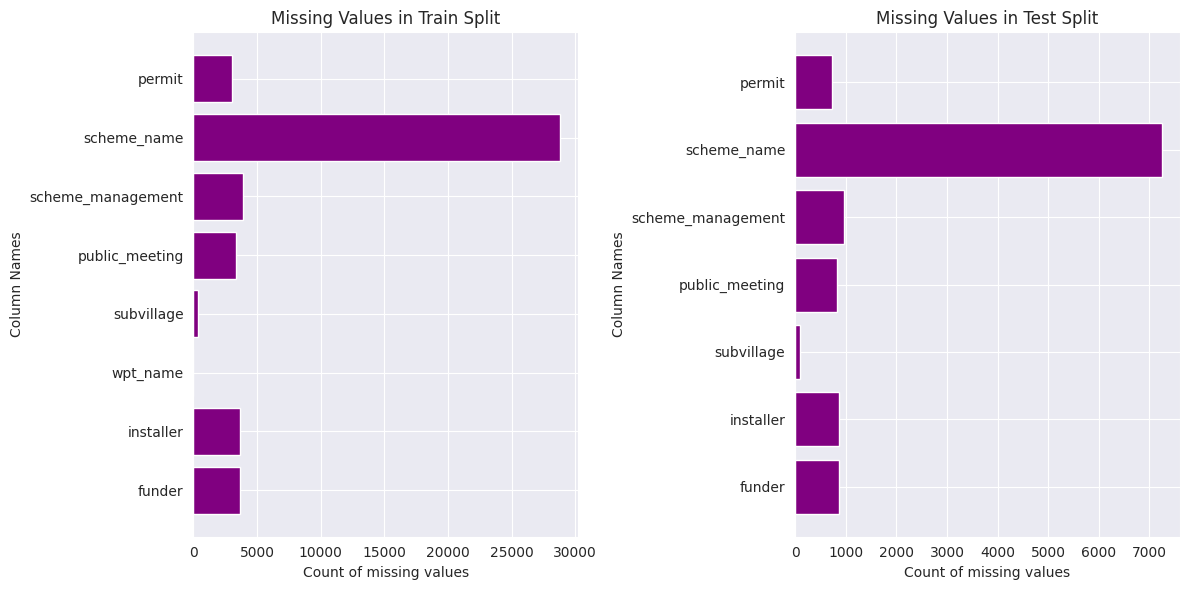

In [142]:
null_columns_train = train_df.columns[train_df.isnull().any()]
null_columns_test = test_df.columns[test_df.isnull().any()]
train_labels = []
train_values = []
test_labels = []
test_values = []

for col in null_columns_train:
    train_labels.append(col)
    train_values.append(train_df[col].isnull().sum())

for col in null_columns_test:
    test_labels.append(col)
    test_values.append(test_df[col].isnull().sum())

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for train split
ind_train = np.arange(len(train_labels))
axes[0].barh(ind_train, np.array(train_values), color='purple')
axes[0].set_yticks(ind_train)
axes[0].set_yticklabels(train_labels, rotation='horizontal')
axes[0].set_xlabel("Count of missing values")
axes[0].set_ylabel("Column Names")
axes[0].set_title("Missing Values in Train Split")

# Plot for test split
ind_test = np.arange(len(test_labels))
axes[1].barh(ind_test, np.array(test_values), color='purple')
axes[1].set_yticks(ind_test)
axes[1].set_yticklabels(test_labels, rotation='horizontal')
axes[1].set_xlabel("Count of missing values")
axes[1].set_ylabel("Column Names")
axes[1].set_title("Missing Values in Test Split")

plt.tight_layout()
plt.show()


In [143]:
nan_col_train = [i for i in train_df.columns if train_df[i].isnull().any()]
print(f'Total number of columns containing null values in the train split are: {len(nan_col_train)}')
print(f'Columns containing null values in the train split are: {nan_col_train}')

print()

nan_col_test = [i for i in test_df.columns if test_df[i].isnull().any()]
print(f'Total number of columns containing null values in the test split are: {len(nan_col_test)}')
print(f'Columns containing null values in the test split are: {nan_col_test}')

Total number of columns containing null values in the train split are: 8
Columns containing null values in the train split are: ['funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

Total number of columns containing null values in the test split are: 7
Columns containing null values in the test split are: ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


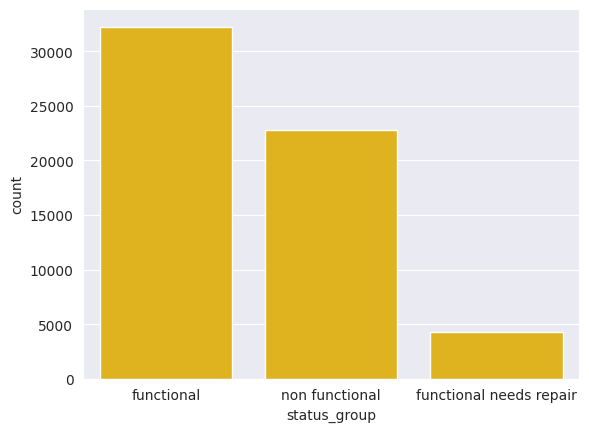

In [144]:
# Checking the predictive variable distribution

sns.set_style("darkgrid");
sns.set_color_codes(palette='bright');
sns.countplot(x=train_df['status_group'],color='y');

### **Note:**

We need to find relevant features which would be important in predicting the result. Intiutively we know that the location and the population around any particular water point would play vital role in the status of that water point.

**Note:**

The latitude and longitude have data which is outside of tanzania . Replacing those points with the mean of the latitude and longitude points.
Most of the regions are closely situated except one region. 

In [146]:
fig = px.scatter(data_frame=train_df,y=train_df['latitude'], x=train_df['longitude'],color=train_df['lga'],opacity=0.5)
fig.show()

In [147]:
print(f"Total unique number of subvillages: {len(train_df.subvillage.unique())}")
print()

Total unique number of subvillages: 19288



**Checking the extraction types based on status groups**

Notably, natural pumping methods demonstrate greater reliability compared to technologically powered systems. To streamline classification, we can group them into three primary types: gravity pumps, hand pumps, and submersible pumps, while placing motor pumps, rope pumps, and wind-powered pumps under the "other" category.


In [148]:
df=train_df.groupby(['extraction_type_class','status_group']).count()['permit'].head(200).reset_index()


fig = px.bar(df, x="extraction_type_class", y="permit",color="status_group", title=" ",width=1000, height=500)

fig.show()

del df

Regionwise functionality distribution of the water pumps

In [149]:
df=train_df.groupby(['lga','status_group']).count()['permit'].head(200).reset_index()


fig = px.bar(df, x="lga", y="permit",color="status_group", title=" ",width=1000, height=500)

fig.show()

del df

**Visualizing the distribution of water pump functionality across different regions using a stacked bar chart**

This figure demonstrates the region-wise water quality distribution

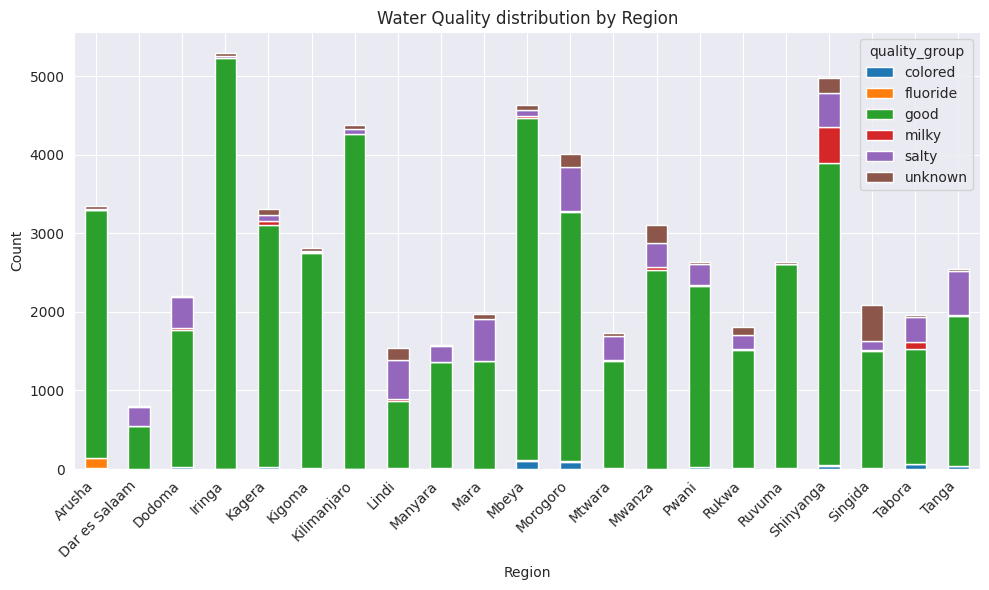

In [150]:
region_func = train_df.groupby(['region', 'quality_group']).size().unstack()

region_func.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Water Quality distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Cleaning the data

**a) Removing duplicate rows**

In [151]:
duplicate_count_train = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count_train}")
print()
duplicate_count_test = test_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count_test}")
print()
print("Observation: There are no duplicate entries")

Number of duplicate rows: 0

Number of duplicate rows: 0

Observation: There are no duplicate entries


**b) Removing irrelevant columns**

Removing the columns that have zero to almost no influence in predicting the final classification

1. amount_tsh -> 75% are zeros and have outliers hence, they are irrelevant and the column will be dropped
2. date_recorded -> The pump functionality may depend on establishment of the pump but when was it recorded in the dataset is irrelevant 
3. wpt_name -> free text, mostly nulls  hence, the column will be dropped
4. latitude, longitude, lga, ward -> as other geographic locations are available these columns will be dropped
5. num_private -> It is mentioned as private in the data card and no description is available hence dropping this column
6. subvillage -> will use district code so dropping this column
7. region -> will use region code so dropping this column
8. recorded_by -> just one single value in all columns and does not contribute to anything in the final prediction so dropping this column  
9. scheme_name -> 50%+ are null entries, free text, will use scheme management  
10. management, scheme_management -> all of these columns have the same types of information so will use extraction_type_group
11. extraction_type, extraction_type_class and extraction_type_group -> all of these columns have the same types of information so will use extraction_type_group  
12. management_group -> will use management  
13. payment_type, payment -> both of these columns have the same types of information and will use payment_type  
14. water_quality -> have only 8 unique values, will aggregate as groups and use them as the quality_group values  
15. quality_group, quantity -> both of these columns have the same types of information and will use quantity_group  
16. source, source_type ->  all of these columns have the same types of information but will use source
17. waterpoint_type, waterpoint_type_group -> both of these columns have the same types of information and will use waterpoint_type_group
18. payment, payment_type -> both of these columns have the same types of information and will use payment

In [152]:
print(train_df.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group'], dtype='object')


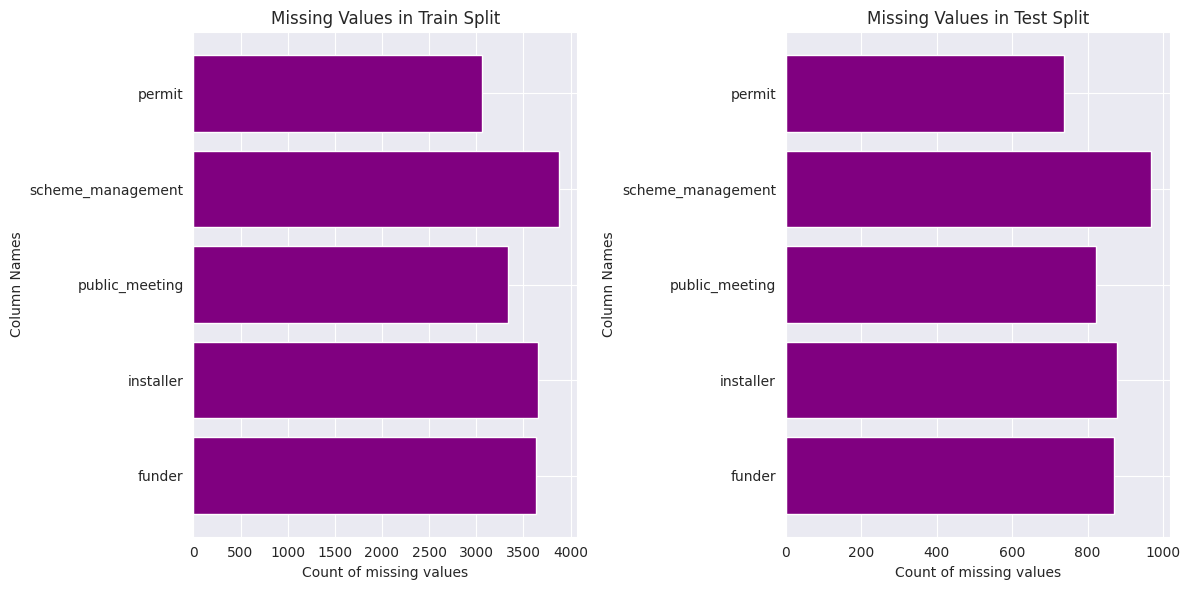

In [153]:
train_df = train_df.drop(['amount_tsh','date_recorded', 'latitude','longitude', 'wpt_name', 'num_private','subvillage', 'region','lga','ward','recorded_by','scheme_name','extraction_type', 'extraction_type_class',
                          'management_group','payment_type','water_quality', 'quantity','source_type','source_class','waterpoint_type'], axis=1)  


test_df = test_df.drop(['amount_tsh','date_recorded', 'latitude','longitude', 'wpt_name', 'num_private','subvillage', 'region','lga','ward','recorded_by','scheme_name','extraction_type', 'extraction_type_class',
                          'management_group','payment_type','water_quality', 'quantity','source_type','source_class','waterpoint_type'], axis=1)  

null_columns_train = train_df.columns[train_df.isnull().any()]
null_columns_test = test_df.columns[test_df.isnull().any()]
train_labels = []
train_values = []
test_labels = []
test_values = []

for col in null_columns_train:
    train_labels.append(col)
    train_values.append(train_df[col].isnull().sum())

for col in null_columns_test:
    test_labels.append(col)
    test_values.append(test_df[col].isnull().sum())

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for train split
ind_train = np.arange(len(train_labels))
axes[0].barh(ind_train, np.array(train_values), color='purple')
axes[0].set_yticks(ind_train)
axes[0].set_yticklabels(train_labels, rotation='horizontal')
axes[0].set_xlabel("Count of missing values")
axes[0].set_ylabel("Column Names")
axes[0].set_title("Missing Values in Train Split")

# Plot for test split
ind_test = np.arange(len(test_labels))
axes[1].barh(ind_test, np.array(test_values), color='purple')
axes[1].set_yticks(ind_test)
axes[1].set_yticklabels(test_labels, rotation='horizontal')
axes[1].set_xlabel("Count of missing values")
axes[1].set_ylabel("Column Names")
axes[1].set_title("Missing Values in Test Split")

plt.tight_layout()
plt.show()

In [154]:
# train_df.to_excel("train_df_cleaned.xlsx",index = False)

In [155]:
train_df.scheme_management.unique()

array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
       'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC'],
      dtype=object)

In [156]:
train_df.installer.unique()

array(['Roman', 'GRUMETI', 'World vision', ..., 'Dina', 'brown',
       'SELEPTA'], dtype=object)

In [157]:
train_df.funder.unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

Checking the unique values in the columns

In [158]:
print("============================ Train Split ============================")
print()
print(f"Total unique number of permit: {len(train_df.permit.unique())}")
print()
print(f"Total unique number of scheme_management: {len(train_df.scheme_management.unique())}")
print()
print(f"Total unique number of public_meeting: {len(train_df.public_meeting.unique())}")
print()
print(f"Total unique number of installer: {len(train_df.installer.unique())}")
print()
print(f"Total unique number of funder: {len(train_df.funder.unique())}")
print()
print()
print()
print("============================ Test Split ============================")
print()
print()
print()
print(f"Total unique number of permit: {len(test_df.permit.unique())}")
print()
print(f"Total unique number of scheme_management: {len(test_df.scheme_management.unique())}")
print()
print(f"Total unique number of public_meeting: {len(test_df.public_meeting.unique())}")
print()
print(f"Total unique number of installer: {len(test_df.installer.unique())}")
print()
print(f"Total unique number of funder: {len(test_df.funder.unique())}")


============================ Train Split ============================

Total unique number of permit: 3

Total unique number of scheme_management: 12

Total unique number of public_meeting: 3

Total unique number of installer: 2146

Total unique number of funder: 1897



============================ Test Split ============================



Total unique number of permit: 3

Total unique number of scheme_management: 12

Total unique number of public_meeting: 3

Total unique number of installer: 1092

Total unique number of funder: 980


In [159]:
print(train_df.columns)

Index(['id', 'funder', 'gps_height', 'installer', 'basin', 'region_code', 'district_code', 'population', 'public_meeting', 'scheme_management', 'permit', 'construction_year', 'extraction_type_group', 'management', 'payment', 'quality_group', 'quantity_group', 'source', 'waterpoint_type_group', 'status_group'], dtype='object')


### Few observations and decisions

1. Since `public_meeting` and `permit` are `boolean` fields, missing values don’t fit neatly into either category. So, we labeled them as 'unknown' assuming that missing data might mean neglected maintenance and a higher chance of pump failure.
2. The `funder`, `installer`, and `scheme_management` columns have 1,897, 2,146, and 12 unique values in the train split and 980, 2146, and 12 unique values in the test split, respectively—too many for modeling, requiring reduction.
3. The `region`, `ward`, `LGA`, `basin`, `district_code`, and `region_code` columns all contain geographic data, likely correlated. The basin column was selected for modeling as it categorizes pumps into nine distinct areas.
4. The `construction_year` and `date_recorded` year provide information on the age of the pumps, an important factor, as it is likely the older a pump is the more likely it is in need of repairs.

The `date_recorded` column was converted to datetime. A `year_recorded` column was added since `construction_year` only includes the year.

In [160]:
# train_df['public_meeting'].fillna('Unknown', inplace=True)
# train_df['permit'].fillna('Unknown', inplace=True)

# test_df['public_meeting'].fillna('Unknown', inplace=True)
# test_df['permit'].fillna('Unknown', inplace=True)

In [161]:
train_df = train_df.dropna()
test_df = test_df.dropna()

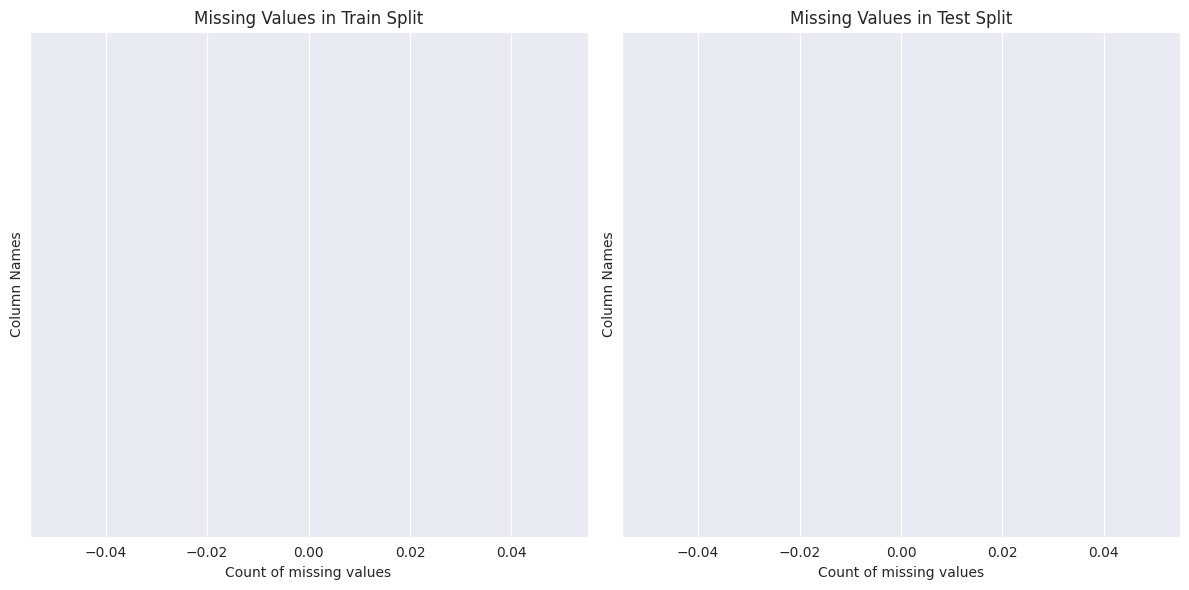

In [162]:
null_columns_train = train_df.columns[train_df.isnull().any()]
null_columns_test = test_df.columns[test_df.isnull().any()]
train_labels = []
train_values = []
test_labels = []
test_values = []

for col in null_columns_train:
    train_labels.append(col)
    train_values.append(train_df[col].isnull().sum())

for col in null_columns_test:
    test_labels.append(col)
    test_values.append(test_df[col].isnull().sum())

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for train split
ind_train = np.arange(len(train_labels))
axes[0].barh(ind_train, np.array(train_values), color='purple')
axes[0].set_yticks(ind_train)
axes[0].set_yticklabels(train_labels, rotation='horizontal')
axes[0].set_xlabel("Count of missing values")
axes[0].set_ylabel("Column Names")
axes[0].set_title("Missing Values in Train Split")

# Plot for test split
ind_test = np.arange(len(test_labels))
axes[1].barh(ind_test, np.array(test_values), color='purple')
axes[1].set_yticks(ind_test)
axes[1].set_yticklabels(test_labels, rotation='horizontal')
axes[1].set_xlabel("Count of missing values")
axes[1].set_ylabel("Column Names")
axes[1].set_title("Missing Values in Test Split")

plt.tight_layout()
plt.show()


In [163]:
train_df.to_excel("train_df_clean.xlsx", index = False)
test_df.to_excel("test_df_clean.xlsx", index = False)

In [164]:
train_df = pd.read_excel("/kaggle/working/train_df_clean.xlsx")
test_df = pd.read_excel("/kaggle/working/test_df_clean.xlsx")

In [165]:
train_df

,id,funder,gps_height,installer,basin,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type_group,management,payment,quality_group,quantity_group,source,waterpoint_type_group,status_group
0,69572,Roman,1390,Roman,Lake Nyasa,11,5,109,True,VWC,False,1999,gravity,vwc,pay annually,good,enough,spring,communal standpipe,functional
1,34310,Lottery Club,686,World vision,Pangani,21,4,250,True,VWC,True,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe,functional
2,67743,Unicef,263,UNICEF,Ruvuma / Southern Coast,90,63,58,True,VWC,True,1986,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe,non functional
3,9944,Mkinga Distric Coun,0,DWE,Pangani,4,8,1,True,VWC,True,2009,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe,functional
4,19816,Dwsp,0,DWSP,Internal,17,3,0,True,VWC,True,0,swn 80,vwc,never pay,good,enough,machine dbh,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48645,11164,World Bank,351,ML appro,Wami / Ruvu,5,6,89,True,VWC,True,2007,submersible,vwc,pay monthly,good,enough,machine dbh,communal standpipe,non functional
48646,60739,Germany Republi,1210,CES,Pangani,3,5,125,True,Water Board,True,1999,gravity,water board,pay per bucket,good,enough,spring,communal standpipe,functional
48647,27263,Cefa-njombe,1212,Cefa,Rufiji,11,4,56,True,VWC,True,1996,gravity,vwc,pay annually,good,enough,river,communal standpipe,functional
48648,31282,Malec,0,Musa,Rufiji,1,4,0,True,VWC,True,0,nira/tanira,vwc,never pay,good,insufficient,shallow well,hand pump,functional


In [166]:
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['funder', 'installer', 'basin', 'scheme_management', 'extraction_type_group', 'management', 'payment', 'quality_group', 'quantity_group', 'source', 'waterpoint_type_group', 'status_group'], dtype='object')


In [167]:
label_encoders = {}

for col in train_df.select_dtypes(include=['object']).columns:  # Only process categorical columns
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])  # Convert categories into numbers
    label_encoders[col] = le  # Save encoder for decoding later

In [168]:
X = train_df.drop(columns=["status_group"])  # Features
y = train_df["status_group"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model

RandomForestClassifier(random_state=42)

In [169]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [170]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.7853

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      5353
           1       0.45      0.32      0.38       655
           2       0.82      0.75      0.78      3722

    accuracy                           0.79      9730
   macro avg       0.69      0.65      0.66      9730
weighted avg       0.78      0.79      0.78      9730



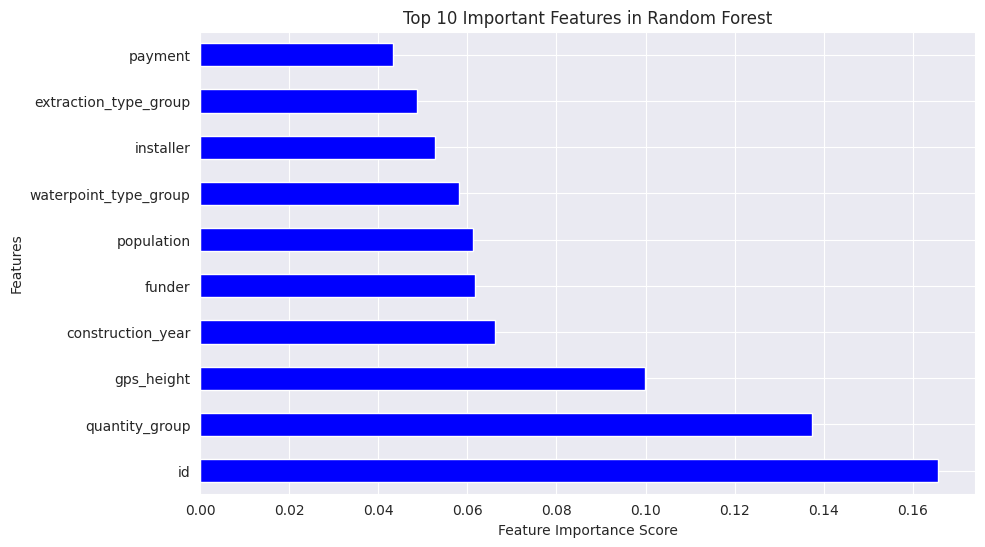

In [171]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns) # Get feature importances


plt.figure(figsize=(10,6))
feature_importances.nlargest(10).plot(kind='barh', color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()